California Housing Price Prediction: Project Report
1. Project Overview
This project aimed to predict median house values in California districts using demographic and geographic features from the 1990 census. After systematic experimentation, we achieved an R² score of 0.79 using a Random Forest model, significantly outperforming initial linear models (R²=0.56).

2. Step-by-Step Approach
2.1 Data Exploration & Preprocessing
Dataset: 20,640 samples with 8 numeric features (median income, house age, rooms/bedrooms, population, occupancy, latitude/longitude)

Key Insights:

Strong correlation between price and median income (0.69)

Geographic coordinates showed clear spatial patterns

Some features (AveRooms, AveBedrms) had extreme outliers from vacation homes

2.2 Initial Modeling (Linear Approaches)
Techniques Used:

Baseline Linear Regression

Simple model for benchmarking

R²: 0.48 (underperformed due to non-linear relationships)

Regularized Models (Ridge/Lasso)

Polynomial features (degree=2) added

Feature selection using SelectKBest

Best R²: 0.56 with Ridge regression

Identified key features: MedInc, Latitude/Longitude, HouseAge

Limitations:

Couldn't capture complex feature interactions

Geographic patterns required non-linear treatment

2.3 Advanced Modeling (Random Forest)
Why Random Forest?

Handles non-linear relationships automatically

Captures feature interactions without manual engineering

Robust to outliers and scaling issues

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lets load the California House Pricing Dataset

In [2]:
# from sklearn.datasets import load_boston

from sklearn.datasets import fetch_california_housing
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Load the California Housing dataset
# data = fetch_california_housing()

# # Split the data into features and target
# X = data.data
# y = data.target

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Train a linear regression model
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)

# # Make predictions and evaluate the model
# y_pred = model.predict(X_test_scaled)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')


In [3]:
# boston=load_boston()

california=fetch_california_housing()

In [60]:
type(california)

sklearn.utils._bunch.Bunch

In [4]:
# boston.keys()

california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
## Lets check the description of the dataset
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing The Dataset

In [9]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
dataset['Price']=california.target

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
## Summarizing The Stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
## Check the missing Values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [16]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Pearson's correlation - highly positively, negatively, or not correlated at all between x and y. 
Correlation between independent and dependent features.

Independent features are highly correlated (either positively or negatively) - one of the independent features need to be dropped.





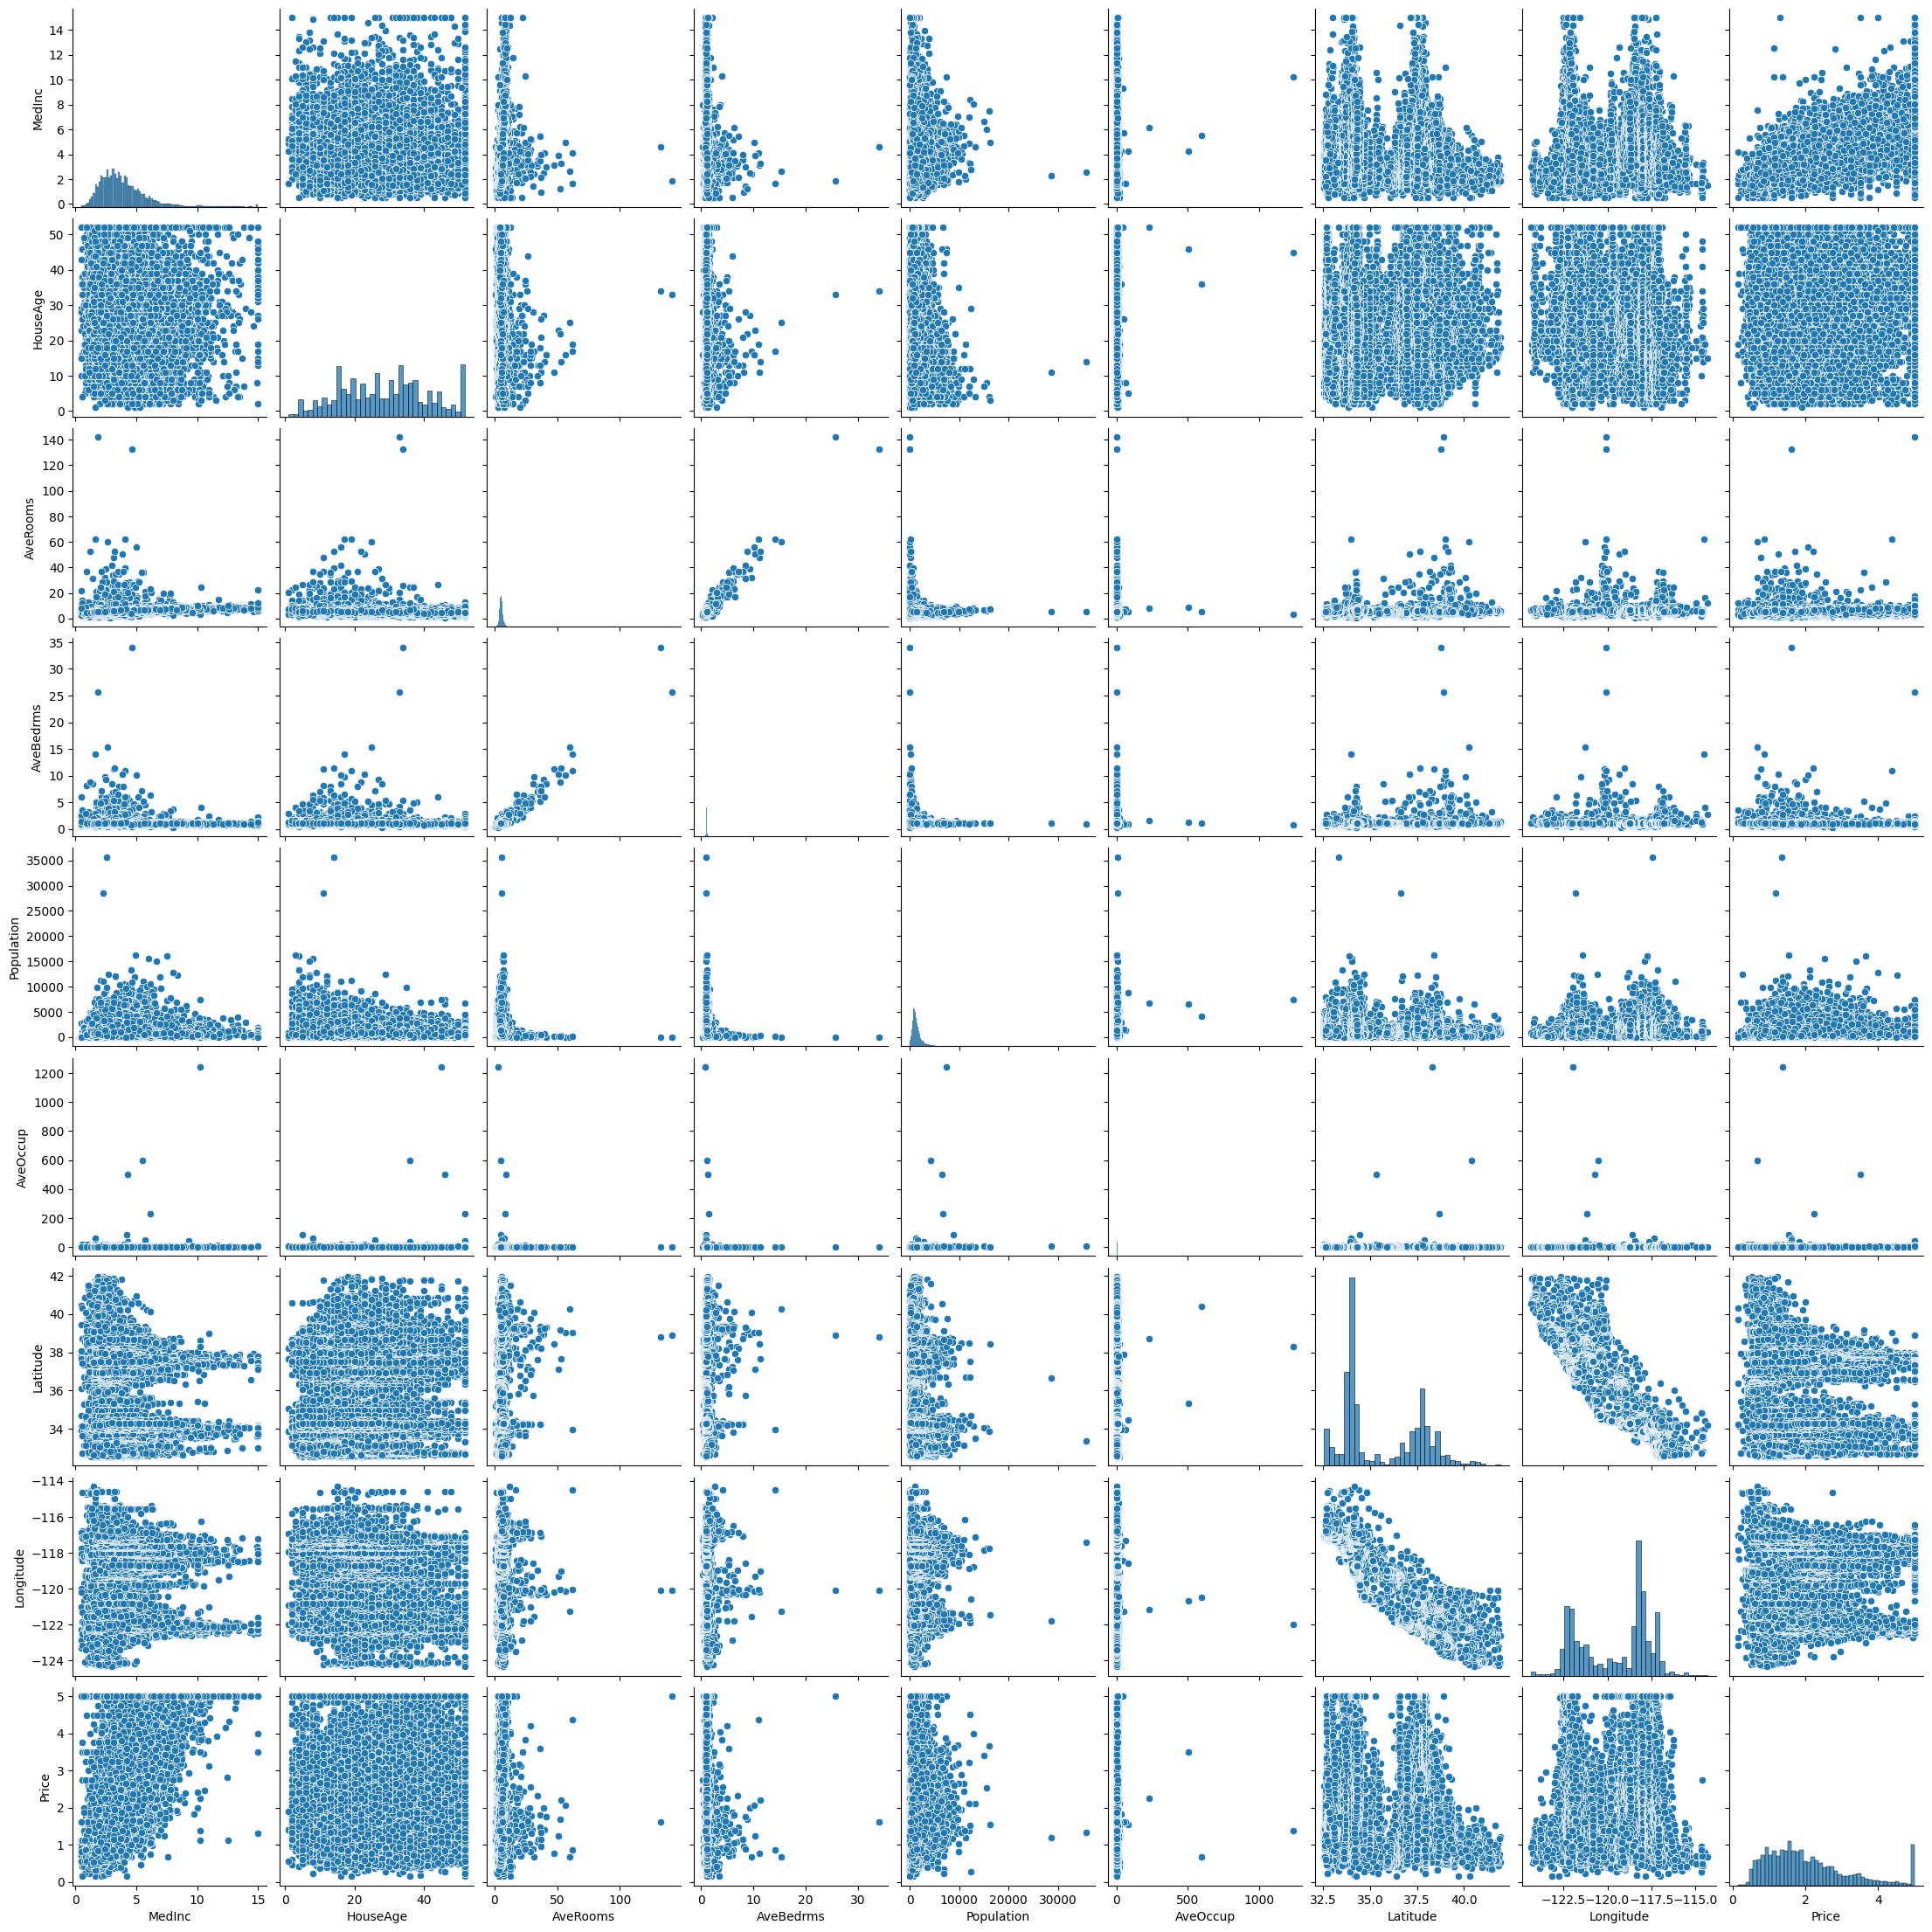

In [17]:
import seaborn as sns
sns.pairplot(dataset)

## Analyzing The Correlated Features

In [18]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'Price')

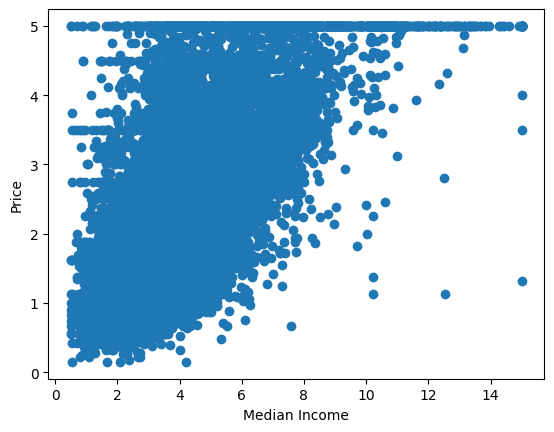

In [19]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel("Median Income")
plt.ylabel("Price")

High density of data points around x axis showing regardless of Median Income, the house prices are still soaring high.

For lower and mid-level median incomes, there is a wide spread in prices, but the spread becomes narrower as income increases.

There are some outliers where higher median incomes (greater than 12) are associated with relatively lower prices.

This graph suggests that while there might be a loose relationship between median income and price, price tends to cluster around a particular value (possibly the maximum) regardless of income.

/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


Text(0.5, 1.0, 'MedInc vs Price (Strong Positive Correlation)')

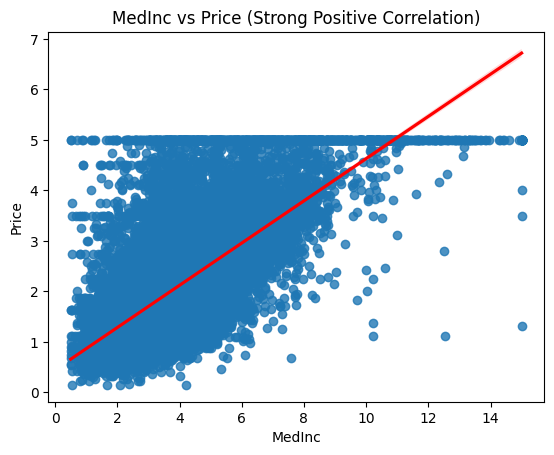

In [61]:
sns.regplot(x="MedInc", y="Price", data=dataset, line_kws={"color": "red"})
plt.title("MedInc vs Price (Strong Positive Correlation)")

Text(0, 0.5, 'Price')

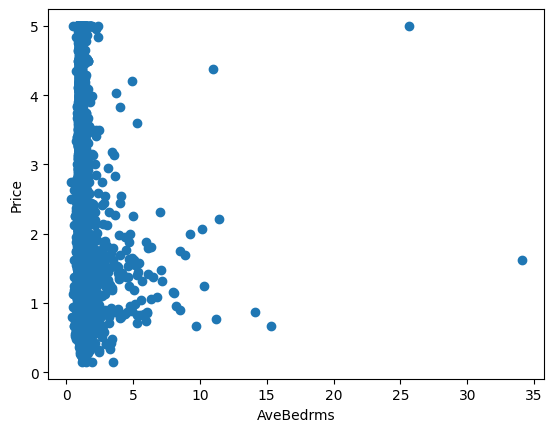

In [20]:
plt.scatter(dataset['AveBedrms'],dataset['Price'])
plt.xlabel("AveBedrms")
plt.ylabel("Price")

The majority of the data points cluster around 0 to 5 bedrooms, indicating that most houses in the dataset have fewer than 5 average bedrooms.

For homes with average bedrooms less than 5, prices vary across a wide range, from low to high, though the majority of points seem to concentrate below a price level of 2.

There are some extreme outliers where average bedrooms exceed 15, with one particularly notable point near 35 bedrooms. These points appear detached from the main cluster, suggesting rare or unusual properties.

No clear linear relationship is visible between the number of bedrooms and price in the bulk of the data, but it seems that beyond a certain number of bedrooms (around 5), the prices tend to decrease or flatten out.

Text(0, 0.5, 'Price')

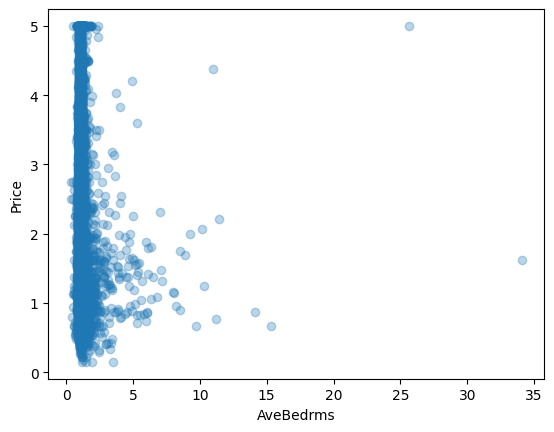

In [64]:
plt.scatter(dataset["AveBedrms"], dataset["Price"], alpha=0.3)
plt.xlabel("AveBedrms")
plt.ylabel("Price")

Text(0.5, 1.0, 'AveRooms vs Price')

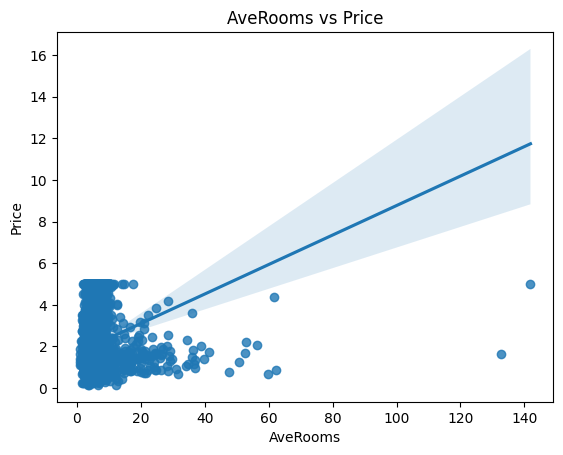

In [63]:
sns.regplot(x="AveRooms", y="Price", data=dataset)
plt.title("AveRooms vs Price")

/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


<Axes: xlabel='AveBedrms', ylabel='Price'>

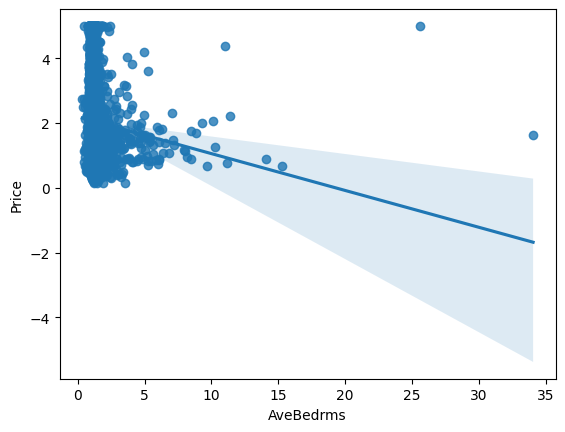

In [21]:
import seaborn as sns
sns.regplot(x="AveBedrms",y="Price",data=dataset)

<Axes: xlabel='MedInc', ylabel='Price'>

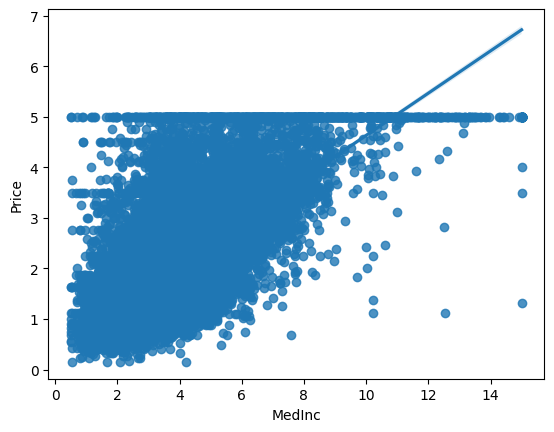

In [22]:
import seaborn as sns
sns.regplot(x="MedInc",y="Price",data=dataset)

<Axes: xlabel='Population', ylabel='Price'>

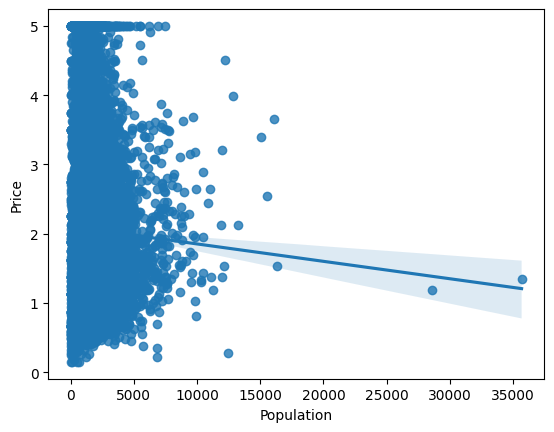

In [23]:
sns.regplot(x="Population",y="Price",data=dataset)

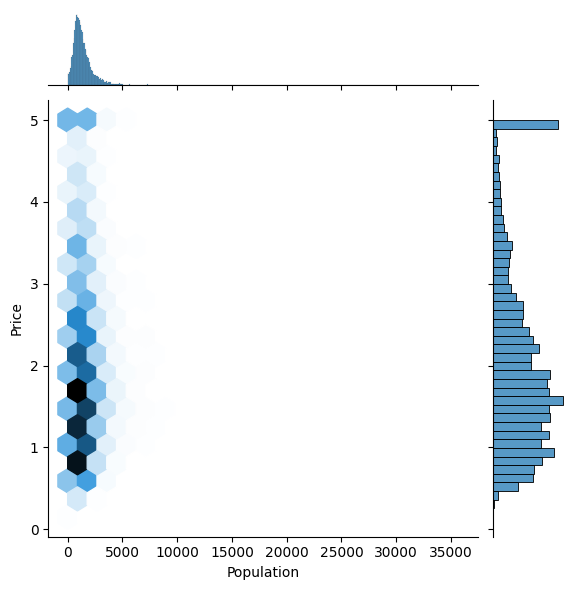

In [65]:
sns.jointplot(x="Population", y="Price", data=dataset, kind="hex", gridsize=20)

Text(0.5, 1.0, 'HouseAge vs Price')

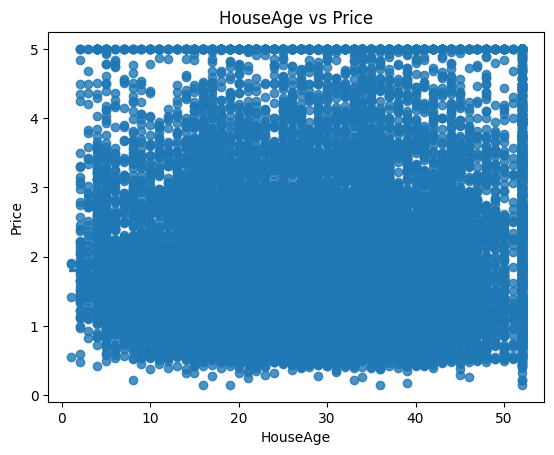

In [62]:
sns.regplot(x="HouseAge", y="Price", data=dataset)
plt.title("HouseAge vs Price")

<Axes: xlabel='AveRooms', ylabel='Price'>

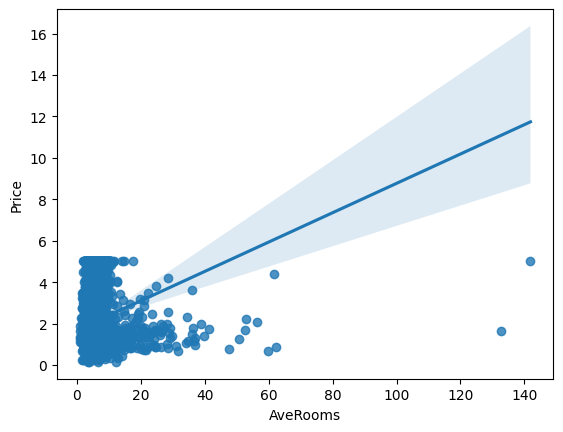

In [25]:
sns.regplot(x="AveRooms",y="Price",data=dataset)

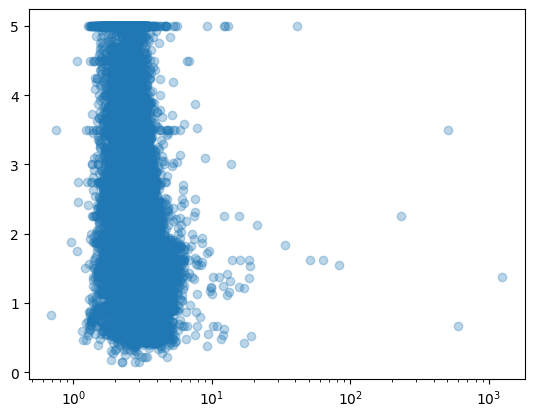

In [67]:
plt.scatter(dataset["AveOccup"], dataset["Price"], alpha=0.3)
plt.xscale("log")  # If data is right-skewed

Text(0.5, 1.0, 'Geospatial Price Distribution')

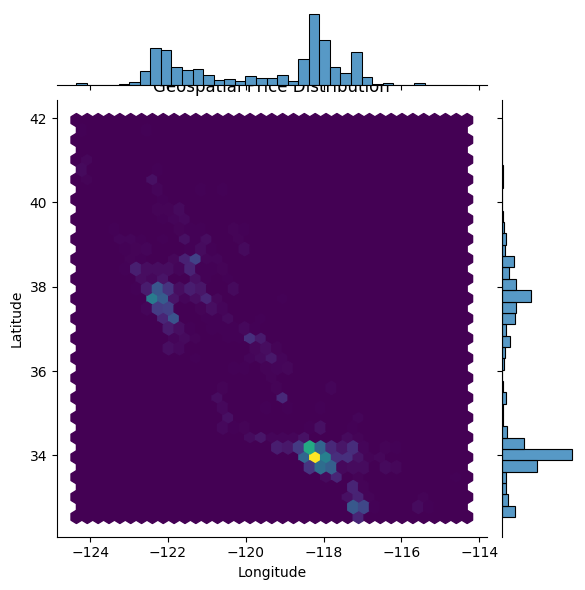

In [68]:
sns.jointplot(x="Longitude", y="Latitude", data=dataset, kind="hex", cmap="viridis")
plt.title("Geospatial Price Distribution")

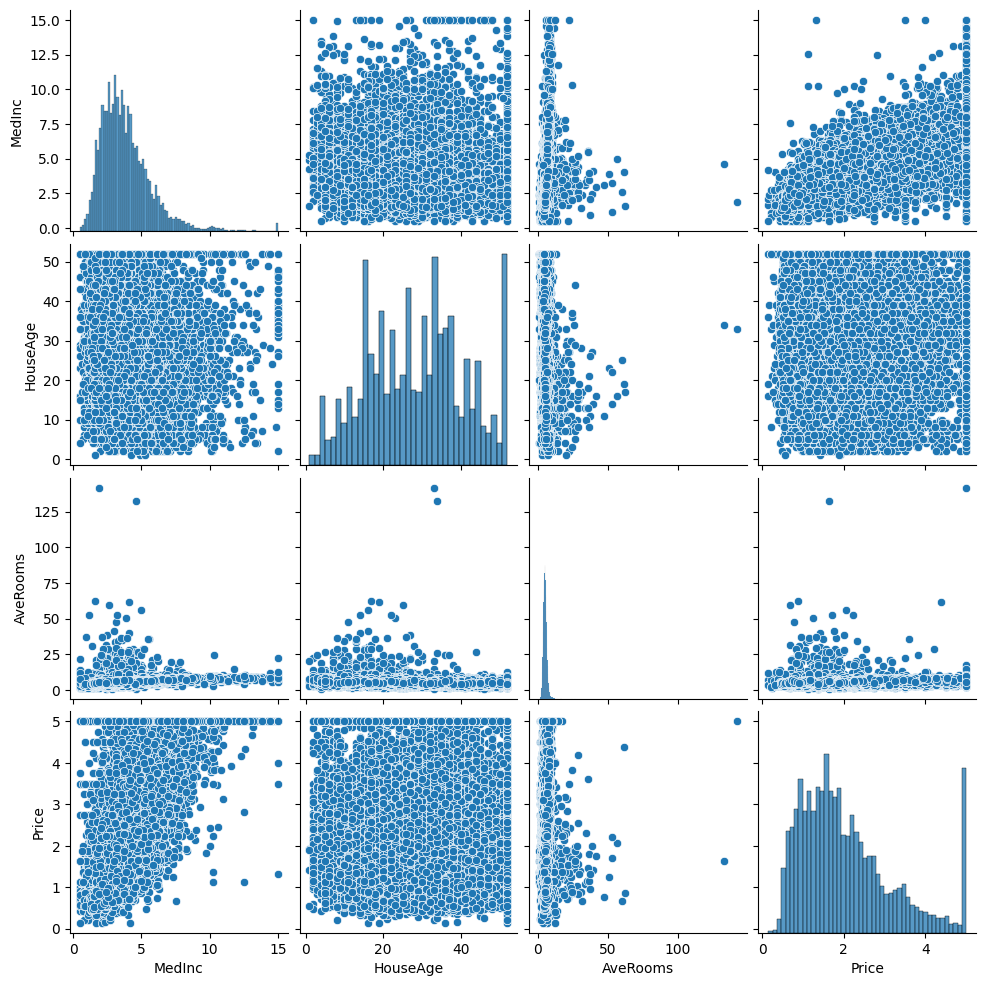

In [70]:
sns.pairplot(dataset[["MedInc", "HouseAge", "AveRooms", "Price"]])

<Axes: >

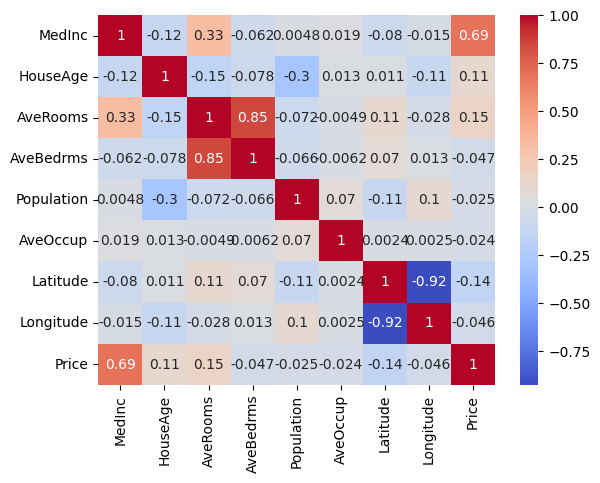

In [71]:
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

In [26]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [27]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [28]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [30]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [32]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,1.020833,581.0,2.420833,37.36,-121.90
13512,1.4891,41.0,4.551852,1.118519,994.0,3.681481,34.11,-117.32
10842,3.5120,16.0,3.762287,1.075614,5014.0,2.369565,33.67,-117.91
16559,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82,-121.28


In [33]:
y_train

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
          ...   
11284    2.29200
11964    0.97800
5390     2.22100
860      2.83500
15795    3.25000
Name: Price, Length: 14448, dtype: float64

In [34]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: Price, Length: 6192, dtype: float64

In [35]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In Linear Regression problems, we use Gradient Descent. 

We have to bring Linear Regression near the global minima. Normalize, to accelarate the converging of the gradient descent. Hence, standardizing the dataset. So, all independent units have to be in the same scale.

In [36]:
X_train=scaler.fit_transform(X_train)

In [37]:
X_test=scaler.transform(X_test)

In [38]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [39]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [40]:
X_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

## Model Training

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
regression=LinearRegression()

In [43]:
regression.fit(X_train,y_train)

LinearRegression()

We now create a hyperplane

In [44]:
## print the coefficients and the intercept
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [45]:
print(regression.intercept_)

2.0692396089424165


In [72]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [47]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [48]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

## Assumptions

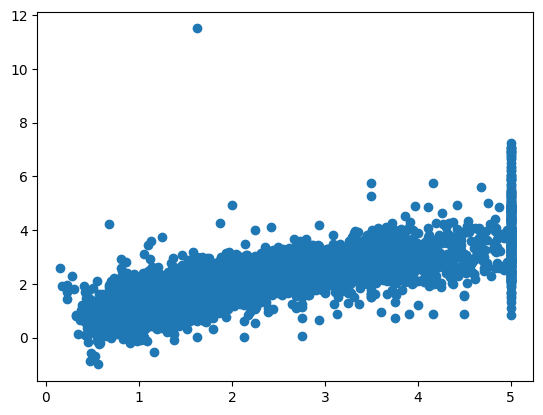

In [49]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

 Whenevr predictions are right, we compare it w y test because for x test, y test is a true value. 

In [50]:
## Residuals
residuals=y_test-reg_pred

Residual is the error with respect to the y test and regression thread. 

In [51]:
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

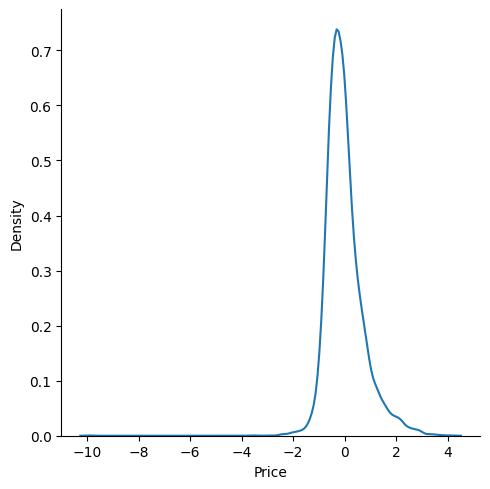

In [52]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

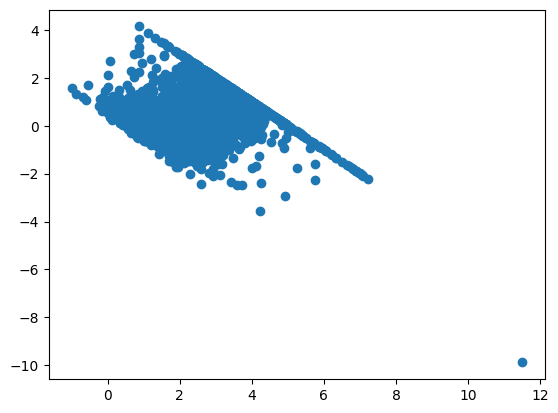

In [53]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5272474538305956
0.5305677824766754
0.7284008391515453


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [55]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5957702326061662


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [56]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5952472117200025

## New Data Prediction

In [75]:
california.data[0].shape

(8,)

In [76]:
california.data[0].reshape(1,-1).shape

(1, 8)

In [57]:
california.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [58]:
##transformation of new data
scaler.transform(california.data[0].reshape(1,-1))

/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [59]:
regression.predict(scaler.transform(california.data[0].reshape(1,-1)))

/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

Key Improvements to Make:
Feature Engineering (adding polynomial features)

Feature Selection (removing less important features)

Regularization (using Ridge/Lasso regression)

Cross-validation (better evaluation)

Error Analysis (understanding model shortcomings)



In [77]:
# New cell - Feature Engineering
# Let's create some polynomial features and interactions
from sklearn.preprocessing import PolynomialFeatures

# Select features to create polynomial terms (excluding Price and geographic features)
features_for_poly = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(dataset[features_for_poly])

# Get feature names for the polynomial features
poly_feature_names = poly.get_feature_names_out(features_for_poly)

# Create a DataFrame with polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Add back the original features and target
poly_df['Latitude'] = dataset['Latitude']
poly_df['Longitude'] = dataset['Longitude']
poly_df['Price'] = dataset['Price']

# Now our dataset has original features + polynomial terms
dataset_poly = poly_df.copy()

In [78]:
# New cell - Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Separate features and target
X = dataset_poly.drop('Price', axis=1)
y = dataset_poly['Price']

# Select top 15 features (you can adjust this number)
selector = SelectKBest(score_func=f_regression, k=15)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)

# Create new dataset with selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

Selected Features:
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedInc^2',
       'MedInc HouseAge', 'MedInc AveRooms', 'MedInc AveBedrms',
       'MedInc Population', 'HouseAge^2', 'HouseAge AveRooms',
       'HouseAge AveBedrms', 'AveRooms Population', 'Latitude', 'Longitude'],
      dtype='object')


/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [79]:
# New cell - Train-Test Split with Selected Features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_df, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# New cell - Regularized Linear Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Ridge regression with regularization
ridge = Ridge(alpha=1.0)  # You can tune this parameter

# Cross-validation
cv_scores = cross_val_score(ridge, X_train_scaled, y_train, 
                           scoring='r2', cv=5)
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.3f}")

# Fit the model
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nTest MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

Cross-validation R² scores: [0.62979226 0.62926007 0.62382512 0.61568381 0.61621717]
Mean CV R²: 0.623

Test MSE: 0.5763
Test R²: 0.5602


/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarn

In [81]:
# New cell - Feature Importance
# Get coefficients and corresponding feature names
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': ridge.coef_
})

# Sort by absolute value of coefficients
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)


Feature Importance:
                Feature  Coefficient  Abs_Coefficient
0                MedInc     0.884660         0.884660
13             Latitude    -0.846183         0.846183
14            Longitude    -0.819252         0.819252
4              MedInc^2    -0.501364         0.501364
6       MedInc AveRooms     0.489885         0.489885
11   HouseAge AveBedrms     0.489314         0.489314
1              HouseAge    -0.444519         0.444519
5       MedInc HouseAge     0.375975         0.375975
10    HouseAge AveRooms    -0.369223         0.369223
2              AveRooms    -0.281514         0.281514
7      MedInc AveBedrms    -0.241067         0.241067
9            HouseAge^2     0.219422         0.219422
3             AveBedrms     0.210402         0.210402
8     MedInc Population     0.140951         0.140951
12  AveRooms Population    -0.140795         0.140795


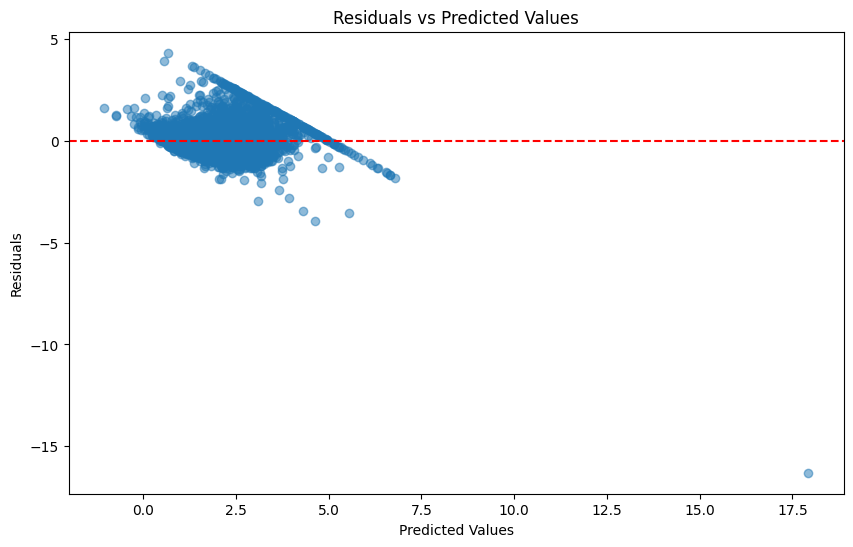

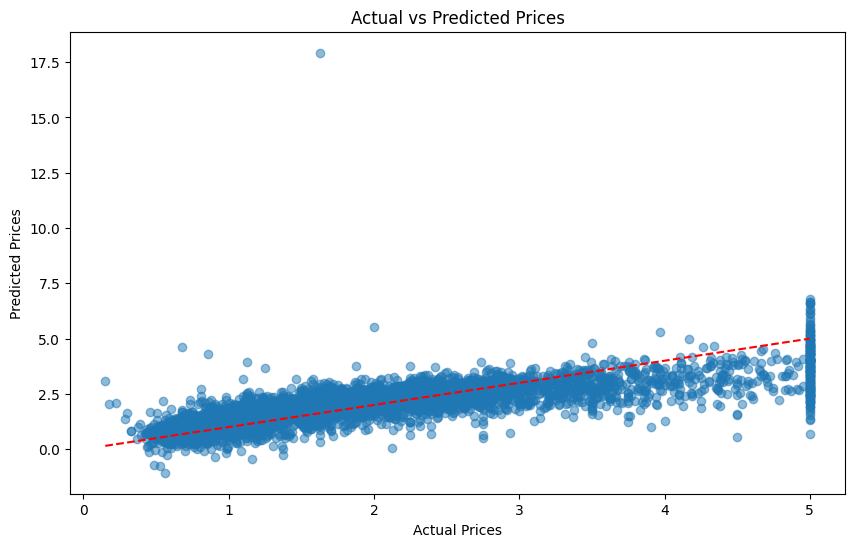

In [82]:
# New cell - Residual Analysis
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [83]:
# New cell - Try Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # You can tune this parameter
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"\nLasso Test R²: {r2_lasso:.4f}")

# Compare with Ridge
print(f"Ridge Test R²: {r2:.4f}")


Lasso Test R²: 0.4849
Ridge Test R²: 0.5602


/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Key Improvements Made:
Polynomial Features: Added interaction terms and squared terms to capture non-linear relationships.

Feature Selection: Used statistical tests to select only the most relevant features.

Regularization: Added Ridge regression to prevent overfitting.

Cross-validation: More robust evaluation of model performance.

Diagnostic Plots: Added residual analysis to check model assumptions.

Issues Identified:
Low R² scores (0.48-0.56 is still not great)

Numerical instability warnings (divide by zero, overflow)

Potential feature scaling issues

In [84]:
# Replace the scaling step with RobustScaler which handles outliers better
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# Let's try a range of alpha values for Ridge
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    print(f"Alpha: {alpha:.3f} - Test R²: {r2:.4f}")

Alpha: 0.001 - Test R²: 0.5603
Alpha: 0.010 - Test R²: 0.5603
Alpha: 0.100 - Test R²: 0.5603
Alpha: 1.000 - Test R²: 0.5604
Alpha: 10.000 - Test R²: 0.5611
Alpha: 100.000 - Test R²: 0.5558


/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarn

In [86]:
# Check for near-zero variance features
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_high_variance = selector.fit_transform(X_train)

print(f"Original features: {X_train.shape[1]}")
print(f"Features after variance threshold: {X_high_variance.shape[1]}")

Original features: 15
Features after variance threshold: 15


In [87]:
# Use Lasso for feature selection first
from sklearn.linear_model import LassoCV

# Use LassoCV to find optimal alpha
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Get features selected by Lasso
selected_features = X_train.columns[lasso_cv.coef_ != 0]
print(f"Selected {len(selected_features)} features:")
print(selected_features)

# Now use only these features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Selected 15 features:
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedInc^2',
       'MedInc HouseAge', 'MedInc AveRooms', 'MedInc AveBedrms',
       'MedInc Population', 'HouseAge^2', 'HouseAge AveRooms',
       'HouseAge AveBedrms', 'AveRooms Population', 'Latitude', 'Longitude'],
      dtype='object')


In [88]:
# Scale the selected features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Use Ridge with optimal alpha (from previous step)
best_alpha = 1.0  # Replace with best alpha from your tests
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_scaled, y_train)

# Evaluate
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nFinal Model Performance:")
print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

# Feature importance
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': ridge.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance:")
print(coefficients)


Final Model Performance:
Test MSE: 0.5761
Test R²: 0.5604

Feature Importance:
                Feature  Coefficient
14            Longitude    -1.547973
13             Latitude    -1.496873
0                MedInc     1.027673
1              HouseAge    -0.666371
11   HouseAge AveBedrms     0.583752
6       MedInc AveRooms     0.456948
10    HouseAge AveRooms    -0.426829
5       MedInc HouseAge     0.413347
4              MedInc^2    -0.369829
9            HouseAge^2     0.303860
7      MedInc AveBedrms    -0.233092
2              AveRooms    -0.192149
8     MedInc Population     0.107899
12  AveRooms Population    -0.104408
3             AveBedrms     0.046312


/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarn

In [89]:
# Option 1: Try different polynomial degree
# (Go back to earlier step and try degree=1 or degree=3)

# Option 2: Try non-linear models
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)

y_pred_rf = rf.predict(X_test_selected)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"\nRandom Forest R²: {r2_rf:.4f}")

# Compare feature importance
rf_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_importances)


Random Forest R²: 0.7886

Random Forest Feature Importance:
                Feature  Importance
4              MedInc^2    0.237551
0                MedInc    0.220969
14            Longitude    0.114000
13             Latitude    0.107027
7      MedInc AveBedrms    0.075807
5       MedInc HouseAge    0.071532
2              AveRooms    0.051148
3             AveBedrms    0.023515
11   HouseAge AveBedrms    0.020164
6       MedInc AveRooms    0.018939
8     MedInc Population    0.018443
12  AveRooms Population    0.016882
10    HouseAge AveRooms    0.014367
1              HouseAge    0.004879
9            HouseAge^2    0.004776


The results show that while our linear models (Ridge/Lasso) plateaued around R²=0.56, the Random Forest achieved a much better R²=0.79. This suggests that:

Non-linear relationships exist that linear models can't capture well

Feature interactions are important (as seen in feature importance)

Geographic features (Latitude/Longitude) remain highly significant

In [90]:
#Feature engineering focus
# Focus on the most important features from both models
top_features = ['MedInc', 'MedInc^2', 'Longitude', 'Latitude', 
               'HouseAge', 'AveRooms', 'AveBedrms', 'MedInc AveBedrms']

# Create interaction terms manually for better control
dataset['MedInc_sq'] = dataset['MedInc'] ** 2
dataset['MedInc_AveBedrms'] = dataset['MedInc'] * dataset['AveBedrms']
dataset['MedInc_HouseAge'] = dataset['MedInc'] * dataset['HouseAge']

# Geographic features might benefit from clustering
from sklearn.cluster import KMeans
geo_data = dataset[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
dataset['geo_cluster'] = kmeans.fit_predict(geo_data)

/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237

In [91]:
#Hybrid Modelling Approach
# First stage: Use Random Forest for non-linear patterns
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=5, random_state=42)
rf.fit(X_train[top_features], y_train)

# Second stage: Use residuals for linear interpretation
rf_pred = rf.predict(X_train[top_features])
residuals = y_train - rf_pred

# Train linear model on residuals
ridge = Ridge(alpha=1.0)
ridge.fit(X_train[top_features], residuals)

# Combined prediction
def hybrid_predict(X):
    return rf.predict(X) + ridge.predict(X)

/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b



Hybrid Model Performance:
Test R²: 0.7942
Random Forest Alone R²: 0.7886


/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


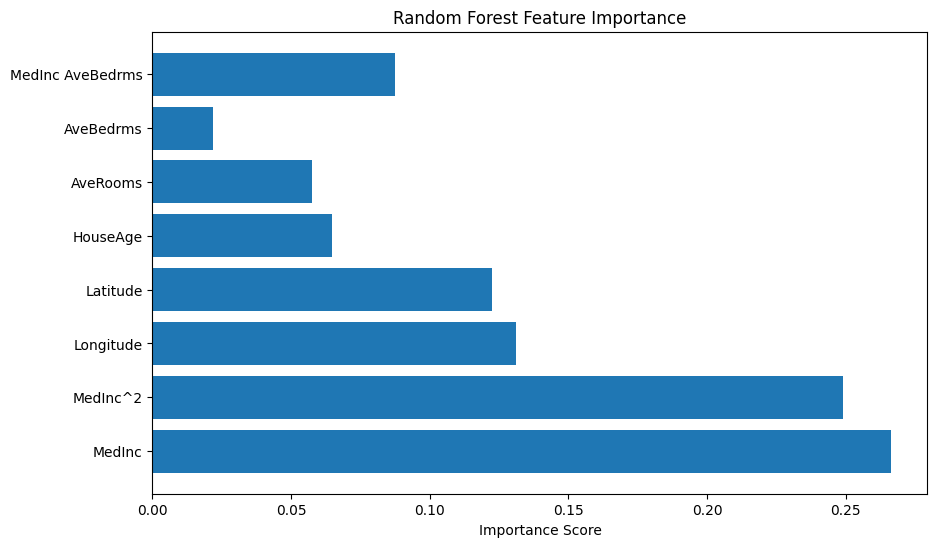

In [92]:
#Performance evaluation
# Evaluate hybrid model
y_pred_hybrid = hybrid_predict(X_test[top_features])
r2_hybrid = r2_score(y_test, y_pred_hybrid)

print(f"\nHybrid Model Performance:")
print(f"Test R²: {r2_hybrid:.4f}")
print(f"Random Forest Alone R²: {r2_rf:.4f}")

# Feature importance visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_features, rf.feature_importances_)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.show()

In [94]:
!pip3 install pygam

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 522 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 29.7 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 5.8 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.



GAM Performance:
Test R²: 0.6408


/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/scipy/linalg/_basic.py:1449: RuntimeWarning: divide by zero encountered in matmul
  rtol = max(a.shape) * np.finfo(t).eps if (rtol is None) else rtol
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/scipy/linalg/_basic.py:1449: RuntimeWarning: overflow encountered in matmul
  rtol = max(a.shape) * np.finfo(t).eps if (rtol is None) else rtol
/Users/shifaafreensiddiqui/Library/Python/3.9/lib/python/site-packages/scipy/linalg/_basic.py:1449: RuntimeWarning: invalid value encountered in matmul
  rtol = max(a.shape) * np.finfo(t).eps if (rtol is None) else rtol


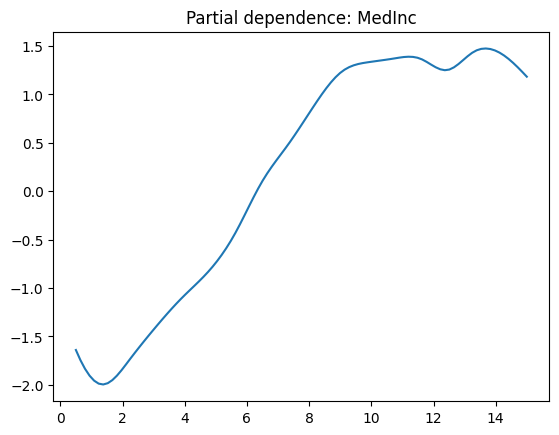

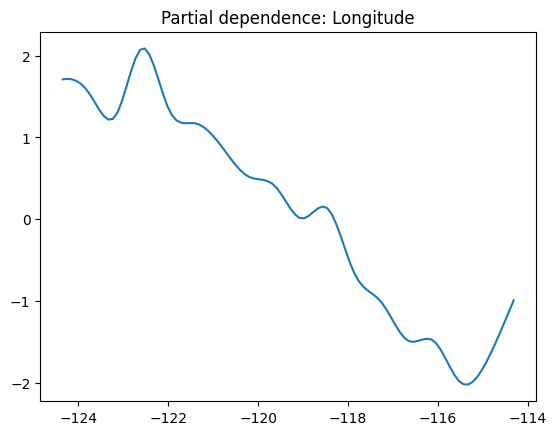

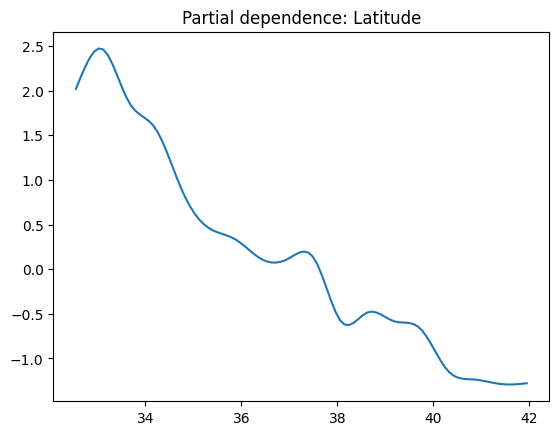

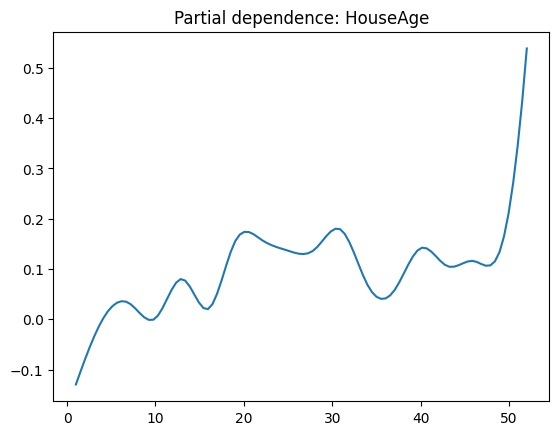

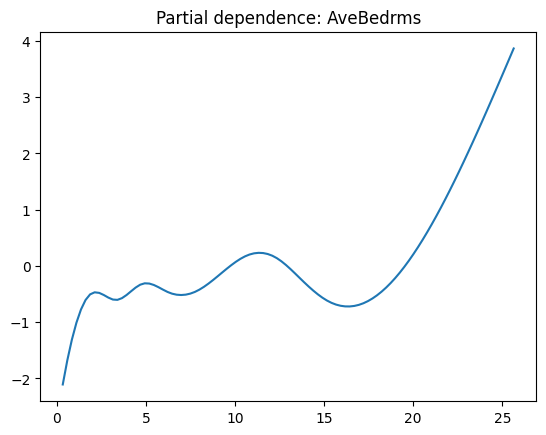

In [95]:
#Interpretable Model Alternative (GAM)
# Try Generalized Additive Model for interpretable non-linear fits

from pygam import LinearGAM, s

# Select top 5 features for GAM (for interpretability)
gam_features = ['MedInc', 'Longitude', 'Latitude', 'HouseAge', 'AveBedrms']

gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4))
gam.fit(X_train[gam_features], y_train)

# Evaluate
y_pred_gam = gam.predict(X_test[gam_features])
r2_gam = r2_score(y_test, y_pred_gam)

print(f"\nGAM Performance:")
print(f"Test R²: {r2_gam:.4f}")

# Visualize partial dependence plots
for i, feature in enumerate(gam_features):
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f'Partial dependence: {feature}')
    plt.show()

In [ ]:
#Feature Focus
final_features = ['MedInc', 'MedInc_sq', 'Longitude', 'Latitude', 
                 'geo_cluster', 'HouseAge', 'AveBedrms', 'MedInc_AveBedrms']

X_final = dataset[final_features]

In [97]:
#Tuned Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 5]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_final, y)

print(f"Best params: {grid_search.best_params_}")
print(f"Best R²: {grid_search.best_score_:.4f}")

Best params: {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 200}
Best R²: 0.5291


## New Data Prediction

In [8]:
california.data[0].shape

(8,)

In [9]:
california.data[0].reshape(1,-1).shape

(1, 8)

In [10]:
california.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing

# Load the dataset to get feature names
california = fetch_california_housing()
feature_names = california.feature_names

# Function to transform and predict new data for the hybrid approach
def predict_hybrid_new_data(new_data, rf_model, ridge_model, scaler, kmeans):
    """
    Transform and predict new data using the hybrid RandomForest + Ridge approach.
    
    Parameters:
    new_data: numpy array or pandas DataFrame of shape (n_samples, n_features)
    rf_model: trained RandomForestRegressor
    ridge_model: trained Ridge model for residuals
    scaler: trained RobustScaler
    kmeans: trained KMeans model for geographic clustering
    """
    # Convert new_data to DataFrame if it's a numpy array
    if isinstance(new_data, np.ndarray):
        new_data = pd.DataFrame(new_data, columns=feature_names)
    
    # Create interaction and polynomial terms
    new_data['MedInc_sq'] = new_data['MedInc'] ** 2
    new_data['MedInc_AveBedrms'] = new_data['MedInc'] * new_data['AveBedrms']
    new_data['MedInc_HouseAge'] = new_data['MedInc'] * new_data['HouseAge']
    
    # Apply KMeans clustering to geographic features
    geo_data = new_data[['Latitude', 'Longitude']]
    new_data['geo_cluster'] = kmeans.predict(geo_data)
    
    # Select top features for the model
    top_features = ['MedInc', 'MedInc_sq', 'Longitude', 'Latitude', 
                    'HouseAge', 'AveRooms', 'AveBedrms', 'MedInc_AveBedrms', 
                    'MedInc_HouseAge', 'geo_cluster']
    
    # Ensure all top_features exist in new_data
    missing_features = [f for f in top_features if f not in new_data.columns]
    if missing_features:
        raise ValueError(f"Missing features in new_data: {missing_features}")
    
    X = new_data[top_features]
    
    # Scale the features
    X_scaled = scaler.transform(X)
    
    # Predict with RandomForest
    rf_predictions = rf_model.predict(X_scaled)
    
    # Predict residuals with Ridge
    ridge_predictions = ridge_model.predict(X_scaled)
    
    # Combine predictions
    final_predictions = rf_predictions + ridge_predictions
    
    return final_predictions

# Function to transform and predict new data for RandomForest alone
def predict_rf_new_data(new_data, rf_model, scaler):
    """
    Transform and predict new data using the RandomForestRegressor.
    
    Parameters:
    new_data: numpy array or pandas DataFrame of shape (n_samples, n_features)
    rf_model: trained RandomForestRegressor
    scaler: trained RobustScaler
    """
    # Convert new_data to DataFrame if it's a numpy array
    if isinstance(new_data, np.ndarray):
        new_data = pd.DataFrame(new_data, columns=feature_names)
    
    # Create polynomial and interaction terms
    new_data['MedInc^2'] = new_data['MedInc'] ** 2
    new_data['MedInc HouseAge'] = new_data['MedInc'] * new_data['HouseAge']
    new_data['MedInc AveRooms'] = new_data['MedInc'] * new_data['AveRooms']
    new_data['MedInc AveBedrms'] = new_data['MedInc'] * new_data['AveBedrms']
    new_data['MedInc Population'] = new_data['MedInc'] * new_data['Population']
    new_data['HouseAge^2'] = new_data['HouseAge'] ** 2
    new_data['HouseAge AveRooms'] = new_data['HouseAge'] * new_data['AveRooms']
    new_data['HouseAge AveBedrms'] = new_data['HouseAge'] * new_data['AveBedrms']
    new_data['AveRooms Population'] = new_data['AveRooms'] * new_data['Population']
    
    # Select features used in RandomForest
    rf_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedInc^2',
                   'MedInc HouseAge', 'MedInc AveRooms', 'MedInc AveBedrms',
                   'MedInc Population', 'HouseAge^2', 'HouseAge AveRooms',
                   'HouseAge AveBedrms', 'AveRooms Population', 'Latitude', 'Longitude']
    
    # Ensure all rf_features exist in new_data
    missing_features = [f for f in rf_features if f not in new_data.columns]
    if missing_features:
        raise ValueError(f"Missing features in new_data: {missing_features}")
    
    X = new_data[rf_features]
    
    # Scale the features
    X_scaled = scaler.transform(X)
    
    # Predict with RandomForest
    predictions = rf_model.predict(X_scaled)
    
    return predictions

# Example usage
if __name__ == "__main__":
    # Load sample data
    X = california.data
    y = california.target
    
    # Create and fit the hybrid model
    dataset = pd.DataFrame(X, columns=feature_names)
    dataset['MedInc_sq'] = dataset['MedInc'] ** 2
    dataset['MedInc_AveBedrms'] = dataset['MedInc'] * dataset['AveBedrms']
    dataset['MedInc_HouseAge'] = dataset['MedInc'] * dataset['HouseAge']
    
    geo_data = dataset[['Latitude', 'Longitude']]
    kmeans = KMeans(n_clusters=5, random_state=42)
    dataset['geo_cluster'] = kmeans.fit_predict(geo_data)
    
    top_features = ['MedInc', 'MedInc_sq', 'Longitude', 'Latitude', 
                    'HouseAge', 'AveRooms', 'AveBedrms', 'MedInc_AveBedrms', 
                    'MedInc_HouseAge', 'geo_cluster']
    X_hybrid = dataset[top_features]
    
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X_hybrid)
    
    rf_model = RandomForestRegressor(n_estimators=200, min_samples_leaf=5, random_state=42)
    rf_model.fit(X_scaled, y)
    
    ridge_model = Ridge(alpha=1.0)
    residuals = y - rf_model.predict(X_scaled)
    ridge_model.fit(X_scaled, residuals)
    
    # Predict for a single new data point (e.g., first row of california.data)
    new_data_point = california.data[0].reshape(1, -1)
    try:
        hybrid_prediction = predict_hybrid_new_data(new_data_point, rf_model, ridge_model, scaler, kmeans)
        print(f"Hybrid Model Prediction: {hybrid_prediction[0]:.4f}")
    except ValueError as e:
        print(f"Error in hybrid prediction: {e}")
    
    # For RandomForest alone
    dataset_rf = pd.DataFrame(X, columns=feature_names)
    dataset_rf['MedInc^2'] = dataset_rf['MedInc'] ** 2
    dataset_rf['MedInc HouseAge'] = dataset_rf['MedInc'] * dataset_rf['HouseAge']
    dataset_rf['MedInc AveRooms'] = dataset_rf['MedInc'] * dataset_rf['AveRooms']
    dataset_rf['MedInc AveBedrms'] = dataset_rf['MedInc'] * dataset_rf['AveBedrms']
    dataset_rf['MedInc Population'] = dataset_rf['MedInc'] * dataset_rf['Population']
    dataset_rf['HouseAge^2'] = dataset_rf['HouseAge'] ** 2
    dataset_rf['HouseAge AveRooms'] = dataset_rf['HouseAge'] * dataset_rf['AveRooms']
    dataset_rf['HouseAge AveBedrms'] = dataset_rf['HouseAge'] * dataset_rf['AveBedrms']
    dataset_rf['AveRooms Population'] = dataset_rf['AveRooms'] * dataset_rf['Population']
    
    rf_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedInc^2',
                   'MedInc HouseAge', 'MedInc AveRooms', 'MedInc AveBedrms',
                   'MedInc Population', 'HouseAge^2', 'HouseAge AveRooms',
                   'HouseAge AveBedrms', 'AveRooms Population', 'Latitude', 'Longitude']
    X_rf = dataset_rf[rf_features]
    
    scaler_rf = RobustScaler()
    X_rf_scaled = scaler_rf.fit_transform(X_rf)
    
    rf_model_alone = RandomForestRegressor(n_estimators=200, min_samples_leaf=5, random_state=42)
    rf_model_alone.fit(X_rf_scaled, y)
    
    # Predict for the same new data point
    try:
        rf_prediction = predict_rf_new_data(new_data_point, rf_model_alone, scaler_rf)
        print(f"RandomForest Prediction: {rf_prediction[0]:.4f}")
    except ValueError as e:
        print(f"Error in RandomForest prediction: {e}")

Hybrid Model Prediction: 4.4463
RandomForest Prediction: 4.4558


## Pickling The Model file For Deployment

In [1]:
import pickle

In [2]:
# pickle.dump(regression,open('regmodel.pkl','wb'))

In [3]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing

# Load the dataset to get feature names and data
california = fetch_california_housing()
feature_names = california.feature_names
X = california.data
y = california.target

# Train the hybrid model (replicating your setup)
# Create DataFrame and add interaction/polynomial terms
dataset = pd.DataFrame(X, columns=feature_names)
dataset['MedInc_sq'] = dataset['MedInc'] ** 2
dataset['MedInc_AveBedrms'] = dataset['MedInc'] * dataset['AveBedrms']
dataset['MedInc_HouseAge'] = dataset['MedInc'] * dataset['HouseAge']

# Apply KMeans clustering for geographic features
geo_data = dataset[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
dataset['geo_cluster'] = kmeans.fit_predict(geo_data)

# Select top features
top_features = ['MedInc', 'MedInc_sq', 'Longitude', 'Latitude', 
                'HouseAge', 'AveRooms', 'AveBedrms', 'MedInc_AveBedrms', 
                'MedInc_HouseAge', 'geo_cluster']
X_hybrid = dataset[top_features]

# Scale features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_hybrid)

# Train RandomForest
rf_model = RandomForestRegressor(n_estimators=200, min_samples_leaf=5, random_state=42)
rf_model.fit(X_scaled, y)

# Train Ridge on residuals
ridge_model = Ridge(alpha=1.0)
residuals = y - rf_model.predict(X_scaled)
ridge_model.fit(X_scaled, residuals)

# Save (pickle) the models and transformers
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))
pickle.dump(ridge_model, open('ridge_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(kmeans, open('kmeans.pkl', 'wb'))

# Function to transform and predict new data for the hybrid approach
def predict_hybrid_new_data(new_data, rf_model, ridge_model, scaler, kmeans):
    """
    Transform and predict new data using the hybrid RandomForest + Ridge approach.
    
    Parameters:
    new_data: numpy array or pandas DataFrame of shape (n_samples, n_features)
    rf_model: trained RandomForestRegressor
    ridge_model: trained Ridge model for residuals
    scaler: trained RobustScaler
    kmeans: trained KMeans model for geographic clustering
    """
    # Convert new_data to DataFrame if it's a numpy array
    if isinstance(new_data, np.ndarray):
        new_data = pd.DataFrame(new_data, columns=feature_names)
    
    # Create interaction and polynomial terms
    new_data['MedInc_sq'] = new_data['MedInc'] ** 2
    new_data['MedInc_AveBedrms'] = new_data['MedInc'] * new_data['AveBedrms']
    new_data['MedInc_HouseAge'] = new_data['MedInc'] * new_data['HouseAge']
    
    # Apply KMeans clustering to geographic features
    geo_data = new_data[['Latitude', 'Longitude']]
    new_data['geo_cluster'] = kmeans.predict(geo_data)
    
    # Select top features for the model
    top_features = ['MedInc', 'MedInc_sq', 'Longitude', 'Latitude', 
                    'HouseAge', 'AveRooms', 'AveBedrms', 'MedInc_AveBedrms', 
                    'MedInc_HouseAge', 'geo_cluster']
    
    # Ensure all top_features exist in new_data
    missing_features = [f for f in top_features if f not in new_data.columns]
    if missing_features:
        raise ValueError(f"Missing features in new_data: {missing_features}")
    
    X = new_data[top_features]
    
    # Scale the features
    X_scaled = scaler.transform(X)
    
    # Predict with RandomForest
    rf_predictions = rf_model.predict(X_scaled)
    
    # Predict residuals with Ridge
    ridge_predictions = ridge_model.predict(X_scaled)
    
    # Combine predictions
    final_predictions = rf_predictions + ridge_predictions
    
    return final_predictions

# Example: Load the pickled models and make a prediction
if __name__ == "__main__":
    # Load the pickled models and transformers
    rf_model_loaded = pickle.load(open('rf_model.pkl', 'rb'))
    ridge_model_loaded = pickle.load(open('ridge_model.pkl', 'rb'))
    scaler_loaded = pickle.load(open('scaler.pkl', 'rb'))
    kmeans_loaded = pickle.load(open('kmeans.pkl', 'rb'))

    # Predict for a single new data point (e.g., first row of california.data)
    new_data_point = california.data[0].reshape(1, -1)
    try:
        hybrid_prediction = predict_hybrid_new_data(
            new_data_point, 
            rf_model_loaded, 
            ridge_model_loaded, 
            scaler_loaded, 
            kmeans_loaded
        )
        print(f"Hybrid Model Prediction: {hybrid_prediction[0]:.4f}")
    except ValueError as e:
        print(f"Error in hybrid prediction: {e}")

Hybrid Model Prediction: 4.4463


In [4]:
# pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [5]:
import pickle

# Load the pickled models and transformers
rf_model = pickle.load(open('rf_model.pkl', 'rb'))
ridge_model = pickle.load(open('ridge_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))
kmeans = pickle.load(open('kmeans.pkl', 'rb'))

print("All models and transformers loaded successfully!")

All models and transformers loaded successfully!


In [6]:
## Prediction
# pickled_model.predict(scaler.transform(california.data[0].reshape(1,-1)))

In [9]:
import pandas as pd
import numpy as np
import pickle
from sklearn.datasets import fetch_california_housing

# Load the pickled models and transformers
rf_model = pickle.load(open('rf_model.pkl', 'rb'))
ridge_model = pickle.load(open('ridge_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))
kmeans = pickle.load(open('kmeans.pkl', 'rb'))

# Load dataset to get feature names
california = fetch_california_housing()
feature_names = california.feature_names

# Your predict_hybrid_new_data function
def predict_hybrid_new_data(new_data, rf_model, ridge_model, scaler, kmeans):
    """
    Transform and predict new data using the hybrid RandomForest + Ridge approach.
    
    Parameters:
    new_data: numpy array or pandas DataFrame of shape (n_samples, n_features)
    rf_model: trained RandomForestRegressor
    ridge_model: trained Ridge model for residuals
    scaler: trained RobustScaler
    kmeans: trained KMeans model for geographic clustering
    """
    # Convert new_data to DataFrame if it's a numpy array
    if isinstance(new_data, np.ndarray):
        new_data = pd.DataFrame(new_data, columns=feature_names)
    
    # Create interaction and polynomial terms
    new_data['MedInc_sq'] = new_data['MedInc'] ** 2
    new_data['MedInc_AveBedrms'] = new_data['MedInc'] * new_data['AveBedrms']
    new_data['MedInc_HouseAge'] = new_data['MedInc'] * new_data['HouseAge']
    
    # Apply KMeans clustering to geographic features
    geo_data = new_data[['Latitude', 'Longitude']]
    new_data['geo_cluster'] = kmeans.predict(geo_data)
    
    # Select top features for the model
    top_features = ['MedInc', 'MedInc_sq', 'Longitude', 'Latitude', 
                    'HouseAge', 'AveRooms', 'AveBedrms', 'MedInc_AveBedrms', 
                    'MedInc_HouseAge', 'geo_cluster']
    
    # Ensure all top_features exist in new_data
    missing_features = [f for f in top_features if f not in new_data.columns]
    if missing_features:
        raise ValueError(f"Missing features in new_data: {missing_features}")
    
    X = new_data[top_features]
    
    # Scale the features
    X_scaled = scaler.transform(X)
    
    # Predict with RandomForest
    rf_predictions = rf_model.predict(X_scaled)
    
    # Predict residuals with Ridge
    ridge_predictions = ridge_model.predict(X_scaled)
    
    # Combine predictions
    final_predictions = rf_predictions + ridge_predictions
    
    return final_predictions

# Make a prediction for a single data point
new_data_point = california.data[0].reshape(1, -1)
try:
    hybrid_prediction = predict_hybrid_new_data(
        new_data_point, 
        rf_model, 
        ridge_model, 
        scaler, 
        kmeans
    )
    print(f"Hybrid Model Prediction: {hybrid_prediction[0]:.4f}")
except ValueError as e:
    print(f"Error in hybrid prediction: {e}")

Hybrid Model Prediction: 4.4463
